In [1]:
from tehran_stocks_class import PinBall_Loss, get_Namad, train_model

/home/hadi/Desktop/python_ML_projects/projects/tehran_stock/venv/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
namad_getter = get_Namad()
selected_namads = namad_getter.filter_Namads(2000, 40)
selected_namads

In [ ]:
namad = namad_getter.get_NamadDatasetByName("فولاد")

In [ ]:
model_trainer = train_model("GRU", 50, 4, loss_obj = PinBall_Loss(0.6), input_BatchSize = 100,
                            train_len = 70)

/home/hadi/Desktop/python_ML_projects/projects/tehran_stock/venv/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
model_trainer.train_on_Namad(namad, epochs = 2, train_test_ratio = 0.1)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | PinBall_Loss     | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 54.0 K
4 | V             | Linear           | 102   
---------------------------------------------------
54.1 K    Trainable params
0         Non-trainable params
54.1 K    Total params
0

Epoch 1: 100%|██████████| 168/168 [00:35<00:00,  4.79it/s, train_loss=0.00371]

INFO: `Trainer.fit` stopped: `max_epochs=2` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 168/168 [00:35<00:00,  4.79it/s, train_loss=0.00371]


In [ ]:
# model_trainer.ts_test.plot( label = ["change test", "volume test"])
model_trainer.ts_train.plot()

NameError: name 'model_trainer' is not defined

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


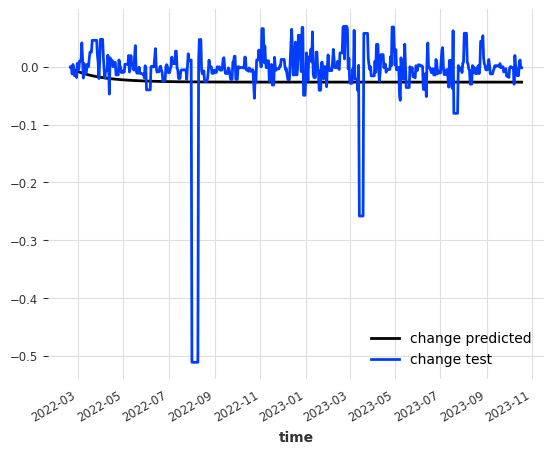

In [ ]:
y_hat = model_trainer.predict_and_plot(which_column = "change")

In [ ]:
from darts.metrics.metrics import mse, mae

model_trainer.evaluate_metrics([mse, mae])

'mse'